# Transfer Learning

Here we experiment using transfer learning models:
- VGG
- MobileNetV2

## Import Libraries

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from skimage import transform
from tqdm import tqdm
import gc

## Functions

In [6]:
def plot_confusion_matrix(cm):

    #Setting the figure size
    fig, ax = plt.subplots(figsize=(12,5))
    
    #Creating the pandas dataframe
    d_cm = pd.DataFrame(cm)
    
    sn.set(font_scale=1)
    
    #Setting the fontsize and plotting the heatmap
    sn.heatmap(d_cm, annot=True, fmt='g',annot_kws={"size": 16})
    
    plt.title('Confusion matrix')
    plt.xlabel('Actual label')
    plt.ylabel('Predicted label');

    plt.show()
    
def acc_versus_epochs(hist):
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,2)
    loss_train = hist.history['accuracy']
    loss_val = hist.history['val_accuracy']
    epochs = range(1,21)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    loss_train = hist.history['loss']
    loss_val = hist.history['val_loss']
    epochs = range(1,21)
    plt.plot(epochs, loss_train, 'g', label='Training Loss')
    plt.plot(epochs, loss_val, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))
        
        
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 
#                                          100*np.max(predictions_array), val_class_names[true_label]), 
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

## Load data

### Train data

In [7]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_train.shape

(27455, 785)

<Axes: >

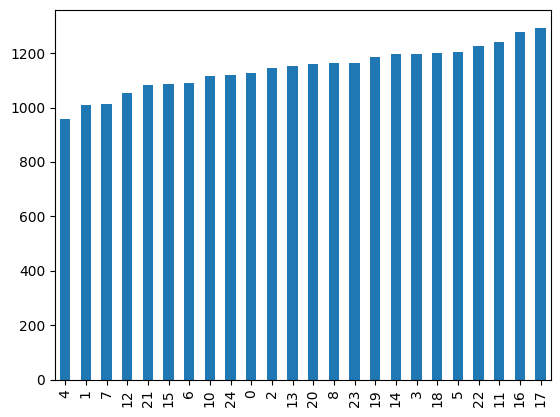

In [8]:
y_train=df_train.label
y_train.value_counts().sort_values().plot(kind='bar') 

In [9]:
x_train=df_train.drop(['label'], axis=1)
x_train=x_train/255.0
x_train.shape

(27455, 784)

### Test data

In [10]:
df_test = pd.read_csv("sign_mnist_test.csv")
df_test.shape

(7172, 785)

<Axes: >

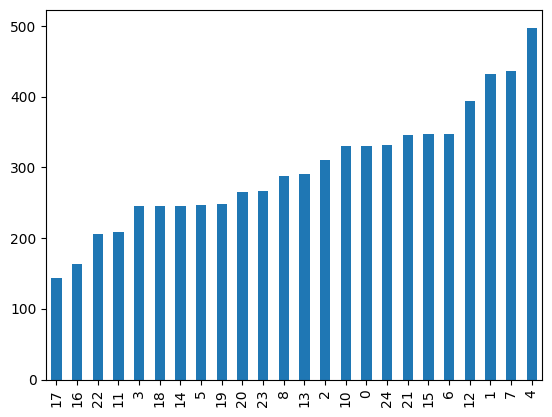

In [11]:
y_test=df_test.label
y_test.value_counts().sort_values().plot(kind='bar') 

In [12]:
x_test=df_test.drop(['label'], axis=1)
x_test=x_test/255.0
x_test.shape

(7172, 784)

## Data Engineering

### Reshaping

In [15]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
x_train.shape,x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

### Converting to RGB

In [16]:
X_train = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(x_train),
    name=None
)

X_test = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(x_test),
    name=None
)

del x_train

### Resizing

In [17]:
X_train_r = []
X_test_r = []

#Training data
for i in tqdm(range(X_train.shape[0])):
    image = transform.resize(X_train[i],(96,96,3))
    X_train_r.append(image)
    del image

#Test data
for i in tqdm(range(X_test.shape[0])):
    image = transform.resize(X_test[i],(96,96,3))
    X_test_r.append(image)
    del image
    
gc.collect()

X_train_r = np.asarray(X_train_r)
X_test_r = np.asarray(X_test_r)

100%|██████████| 7172/7172 [00:20<00:00, 350.57it/s]


In [18]:
print("Shape of X Train : ", X_train_r.shape)
print("Shape of X Test : ", X_test_r.shape)

del X_train

Shape of X Train :  (27455, 96, 96, 3)
Shape of X Test :  (7172, 96, 96, 3)


### Plotting training data

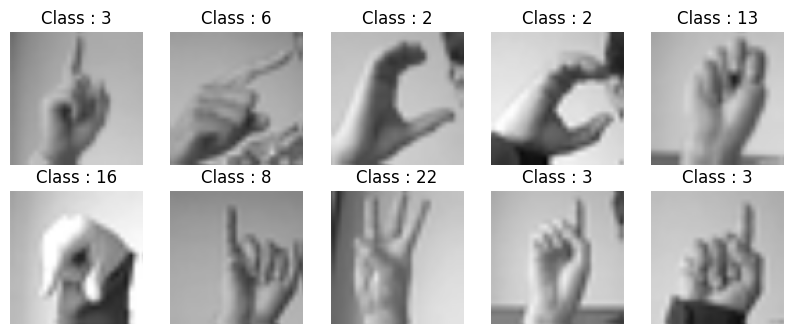

In [19]:
plt.figure(figsize = (10, 10))
count = 1
idd = 0
for i in range(5):
    for j in range(2):
        plt.subplot(5, 5, count)
        plt.imshow(X_train_r[idd], cmap = 'gray')
        plt.axis('off')
        plt.title('Class : '+ str(y_train[idd]))
        idd += 1
        count += 1

### One hot encoding

In [20]:
#One-Hot encoding the labels
from keras.utils.np_utils import to_categorical

#For training data
y_trainHot = np.uint8(to_categorical(y_train, num_classes = 25))

#For test data
y_testHot = np.uint8(to_categorical(y_test, num_classes = 25))

### Split train data

In [21]:
from sklearn.model_selection import train_test_split

#Splitting the data for training and validating
#20% Validation set and 80% for Training set
X_train_s, X_valid_s, y_train, y_valid = train_test_split(X_train_r, y_trainHot, test_size=0.2, random_state=42)

del X_train_r

## Transfer Learning MobileNetV2

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Input

#Importing the MobileNetV2 model with the pretrained imagenet weights
MobileModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(96, 96, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [28]:
#Adding the final dense layers to the pretrained model
modelHead = MobileModel.output
modelHead = MaxPooling2D(pool_size=(3, 3))(modelHead)
modelHead = Flatten(name="flatten")(modelHead)
modelHead = Dense(128, activation="relu")(modelHead)
modelHead = Dense(32, activation="relu")(modelHead)
modelHead = Dense(25, activation="softmax")(modelHead)

In [29]:
from tensorflow.keras.models import Model

#The final model with all the layers
model = Model(inputs=MobileModel.input, outputs=modelHead)

In [30]:
from tensorflow.keras.optimizers import Adam

num_epochs = 20
batch_size = 100

#Setting the initial layers of model as non trainable
for layer in MobileModel.layers:
    layer.trainable = False

#Compiling the model
opt = Adam(learning_rate = 1e-4)
model.compile(loss = "categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [31]:
#Summary of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

### Training the model

In [32]:
#Training the model
historyModel = model.fit(X_train_s,y_train, 
              batch_size = batch_size,
              validation_data = (X_valid_s, y_valid), 
              epochs = num_epochs)

Epoch 1/20
220/220 [==============================] - 30s 122ms/step - loss: 3.1169 - accuracy: 0.1103 - val_loss: 2.6550 - val_accuracy: 0.2131
Epoch 2/20
220/220 [==============================] - 24s 109ms/step - loss: 2.2990 - accuracy: 0.3191 - val_loss: 1.9090 - val_accuracy: 0.4628
Epoch 3/20
220/220 [==============================] - 24s 111ms/step - loss: 1.5603 - accuracy: 0.5578 - val_loss: 1.4016 - val_accuracy: 0.5992
Epoch 4/20
220/220 [==============================] - 24s 110ms/step - loss: 1.0772 - accuracy: 0.6982 - val_loss: 0.9565 - val_accuracy: 0.7319
Epoch 5/20
220/220 [==============================] - 25s 112ms/step - loss: 0.8010 - accuracy: 0.7818 - val_loss: 0.7610 - val_accuracy: 0.7840
Epoch 6/20
220/220 [==============================] - 25s 113ms/step - loss: 0.6315 - accuracy: 0.8361 - val_loss: 0.6102 - val_accuracy: 0.8365
Epoch 7/20
220/220 [==============================] - 25s 114ms/step - loss: 0.5198 - accuracy: 0.8701 - val_loss: 0.4899 - val_ac

### Plotting accuracy vs epoch

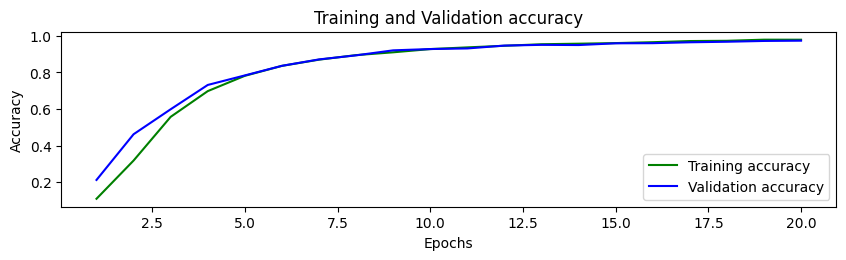

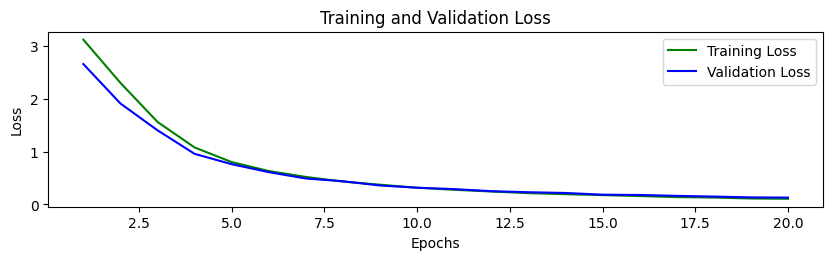

In [33]:
acc_versus_epochs(historyModel)

225/225 [==============================] - 8s 37ms/step


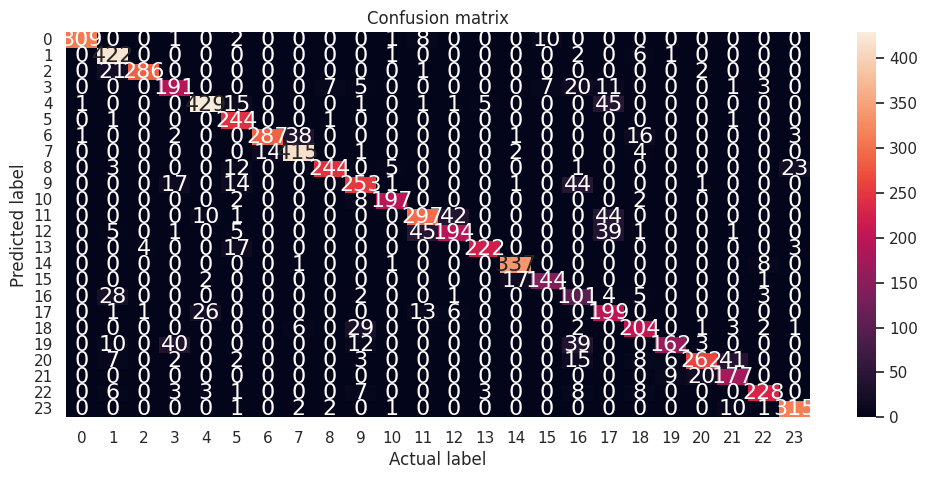

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

#Predicting the values of test data
y_pred = model.predict(X_test_r)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testHot,axis=1)

confusion_mtx = [Y_true, Y_pred_classes]

plot_confusion_matrix(confusion_matrix(Y_true,Y_pred_classes))

In [39]:
from sklearn.metrics import recall_score,precision_score,f1_score

print("Accuracy of MobileNetV2 for Sign MNIST : " , recall_score(Y_true, Y_pred_classes, average='weighted'))

print("Precision score of MobileNetV2 for Sign MNIST " , precision_score(Y_true, Y_pred_classes, average='weighted'))

print("F1 score of MobileNetV2 for Sign MNIST : " , recall_score(Y_true, Y_pred_classes, average='weighted'))

Accuracy of MobileNetV2 for Sign MNIST :  0.8531790295593976
Precision score of MobileNetV2 for Sign MNIST  0.8662093489601946
F1 score of MobileNetV2 for Sign MNIST :  0.8531790295593976


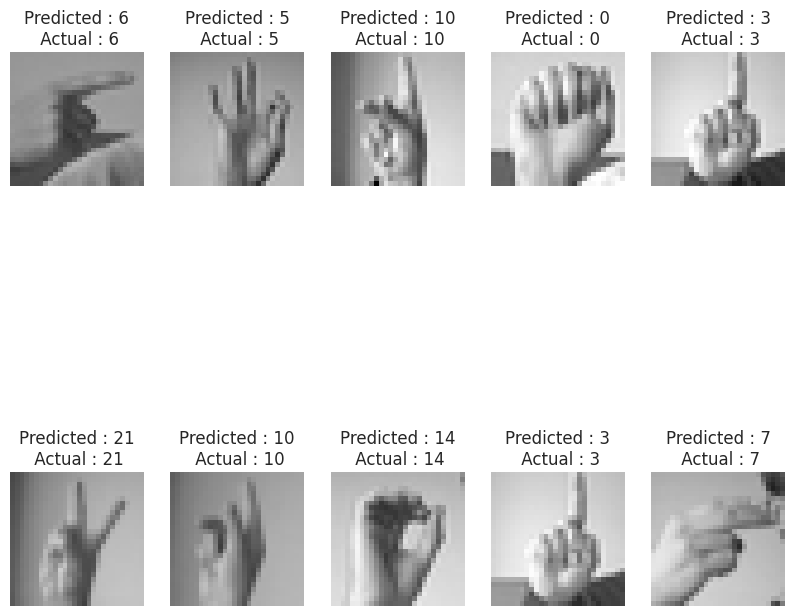

In [40]:
#Plotting the test data along with predicted class labels
plt.figure(figsize = (10, 10))
count = 1
idd = 0
for i in range(5):
    for j in range(2):
        plt.subplot(2, 5, count)
        plt.imshow(X_test[idd], cmap = 'gray')
        plt.axis('off')
        plt.title('Predicted : '+ str(Y_pred_classes[idd]) +'\n Actual : ' + str(Y_true[idd]))
        idd += 1
        count += 1

## Transfer Learning VGG

In [42]:
from tensorflow.keras.applications import VGG16
model_vgg16=VGG16(weights='imagenet')
model_vgg16.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [52]:
from tensorflow.keras import models, layers
input_layer=layers.Input(shape=(96,96,3))

In [53]:
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

In [54]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

In [55]:
last_layer=model_vgg16.output

In [56]:
flatten=layers.Flatten()(last_layer) 

In [57]:
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)

In [58]:
output_layer=layers.Dense(25,activation='softmax')(flatten)

In [59]:
model=models.Model(inputs=input_layer,outputs=output_layer)

In [60]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0   

In [61]:
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0   

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (

In [64]:
history = model.fit(X_train_s,y_train,epochs=20,batch_size=128,verbose=True,validation_data=(X_valid_s,y_valid))

Epoch 1/20
172/172 [==============================] - 175s 1s/step - loss: 0.8584 - accuracy: 0.8530 - val_loss: 0.2846 - val_accuracy: 0.9781
Epoch 2/20
172/172 [==============================] - 173s 1s/step - loss: 0.1748 - accuracy: 0.9928 - val_loss: 0.1245 - val_accuracy: 0.9969
Epoch 3/20
172/172 [==============================] - 176s 1s/step - loss: 0.0884 - accuracy: 0.9983 - val_loss: 0.0723 - val_accuracy: 0.9984
Epoch 4/20
172/172 [==============================] - 179s 1s/step - loss: 0.0549 - accuracy: 0.9993 - val_loss: 0.0492 - val_accuracy: 0.9995
Epoch 5/20
172/172 [==============================] - 179s 1s/step - loss: 0.0383 - accuracy: 0.9996 - val_loss: 0.0359 - val_accuracy: 0.9996
Epoch 6/20
172/172 [==============================] - 181s 1s/step - loss: 0.0282 - accuracy: 0.9999 - val_loss: 0.0273 - val_accuracy: 0.9996
Epoch 7/20
172/172 [==============================] - 179s 1s/step - loss: 0.0220 - accuracy: 0.9998 - val_loss: 0.0220 - val_accuracy: 0.9996

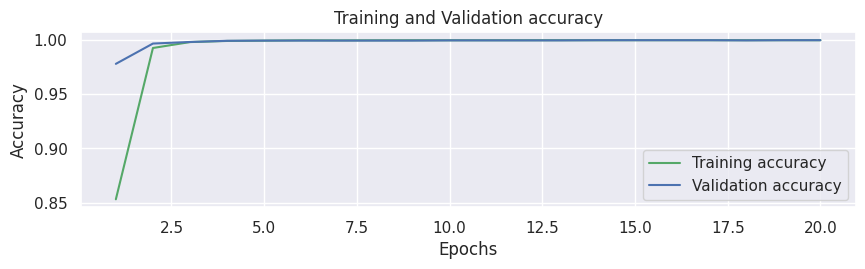

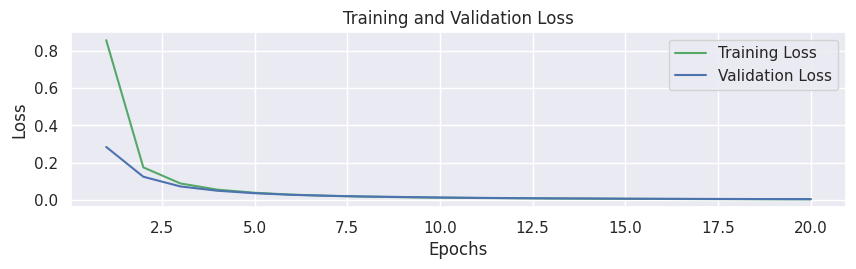

In [65]:
acc_versus_epochs(history)

### Predictions

225/225 [==============================] - 47s 207ms/step


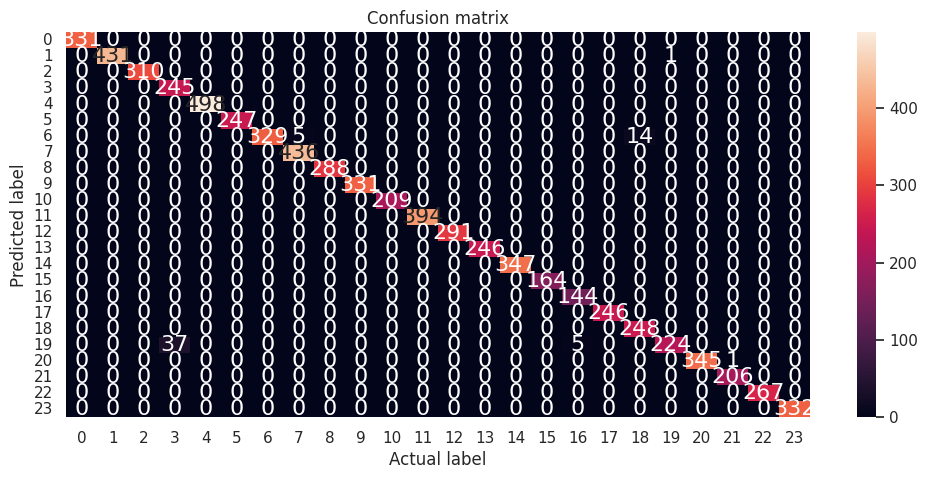

In [66]:
#Predicting the values of test data
y_pred = model.predict(X_test_r)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_testHot,axis=1)

confusion_mtx = [Y_true, Y_pred_classes]

plot_confusion_matrix(confusion_matrix(Y_true,Y_pred_classes))

In [68]:
from sklearn.metrics import recall_score,precision_score,f1_score

print("Accuracy of VGG16 for Sign MNIST : " , recall_score(Y_true, Y_pred_classes, average='weighted'))

print("Precision score of VGG16 for Sign MNIST " , precision_score(Y_true, Y_pred_classes, average='weighted'))

print("F1 score of VGG16 for Sign MNIST : " , recall_score(Y_true, Y_pred_classes, average='weighted'))

Accuracy of VGG16 for Sign MNIST :  0.9912158393753486
Precision score of VGG16 for Sign MNIST  0.9920035952042787
F1 score of VGG16 for Sign MNIST :  0.9912158393753486
